In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_frame = pd.read_csv('/content/drive/MyDrive/Apple_Leaf_Disease_Explainable ML/plant_img/parkinsons.data')

In [ ]:
data_frame.shape

(195, 24)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
data_frame.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [ ]:
correlation=data_frame.corr()
correlation

<ipython-input-14-bc77e6b5aa67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data_frame.corr()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

In [ ]:
print(data_frame.isnull().values.any())

False


In [ ]:
data_frame['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

<Axes: xlabel='status', ylabel='count'>

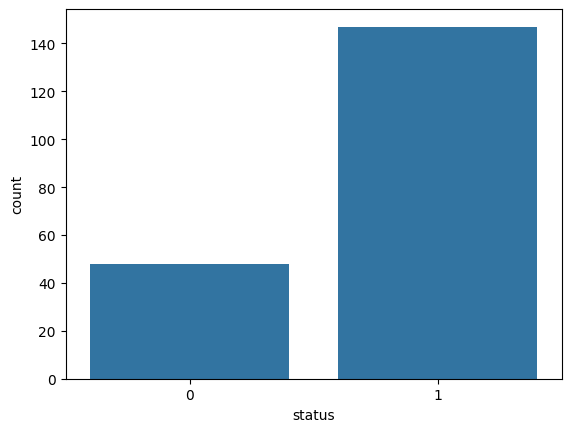

In [ ]:
sns.countplot(x ='status', data = data_frame)

In [ ]:
#iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parkinsons.data')
X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=columns)

# Perform LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

# Extract the coefficients for each feature
coefficients = lda.coef_

# Visualize the importance of each feature
feature_importance = pd.Series(coefficients.ravel(), index=columns).sort_values(ascending=False)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
Shimmer:APQ3        103277.920240
MDVP:RAP             13455.296160
MDVP:PPQ               596.972052
MDVP:Shimmer           434.969167
PPE                     19.041925
spread2                 13.930614
DFA                      5.194187
MDVP:Shimmer(dB)         2.070473
D2                       1.101826
spread1                  0.872576
MDVP:Fhi(Hz)            -0.002700
MDVP:Flo(Hz)            -0.016838
MDVP:Fo(Hz)             -0.031892
HNR                     -0.171517
RPDE                   -11.235491
NHR                    -26.465545
MDVP:APQ               -28.002352
Shimmer:APQ5          -435.480452
Jitter:DDP           -2975.288508
MDVP:Jitter(%)       -3075.937051
MDVP:Jitter(Abs)    -33776.455729
Shimmer:DDA         -34515.805442
dtype: float64


# **bagging ensemble technique**: Bagging (Bootstrap Aggregating) is an ensemble technique that involves training multiple instances of the same base model on different subsets of the training data and then averaging the predictions.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base Decision Tree classifier
base_classifier = DecisionTreeClassifier()

# Create a Bagging classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the Bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=968482374f0e3c3cbaa4b52649ec244488afaf4c525008291b118f39b8b9199a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=bagging_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Intercept 0.5960775308487437
Prediction_local [0.83840999]
Right: 0.98


In [ ]:
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=bagging_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Intercept 0.607584845578041
Prediction_local [0.83199378]
Right: 1.0


In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42).fit(X_train, y_train)
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer(X)

  0%|          | 0/195 [00:00<?, ?it/s]

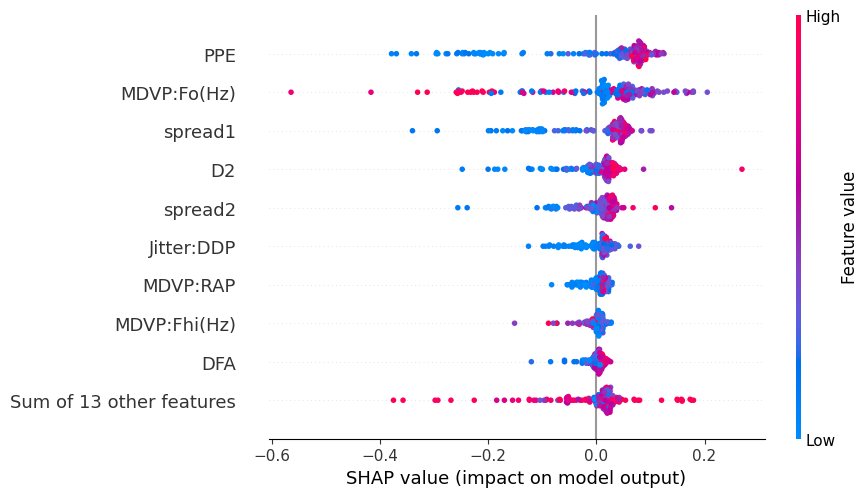

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

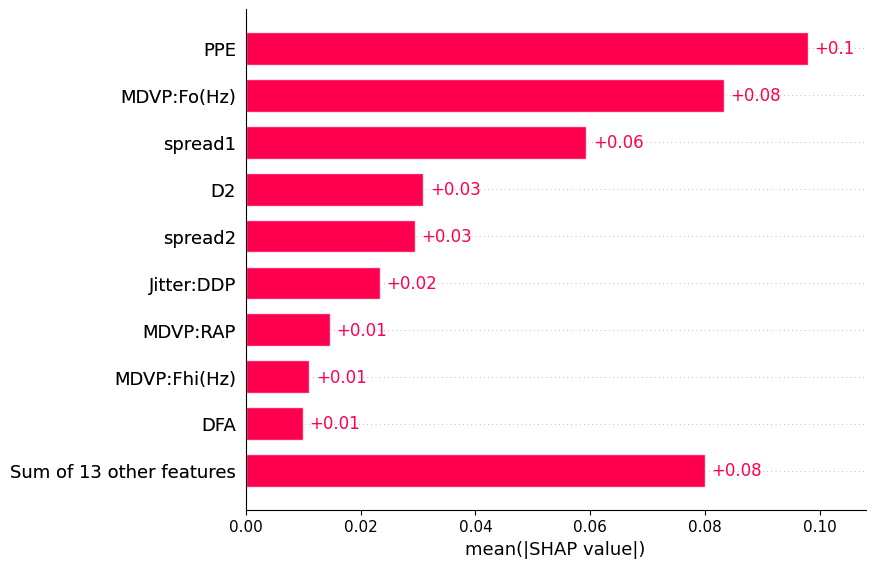

In [ ]:
shap.plots.bar(shap_values)

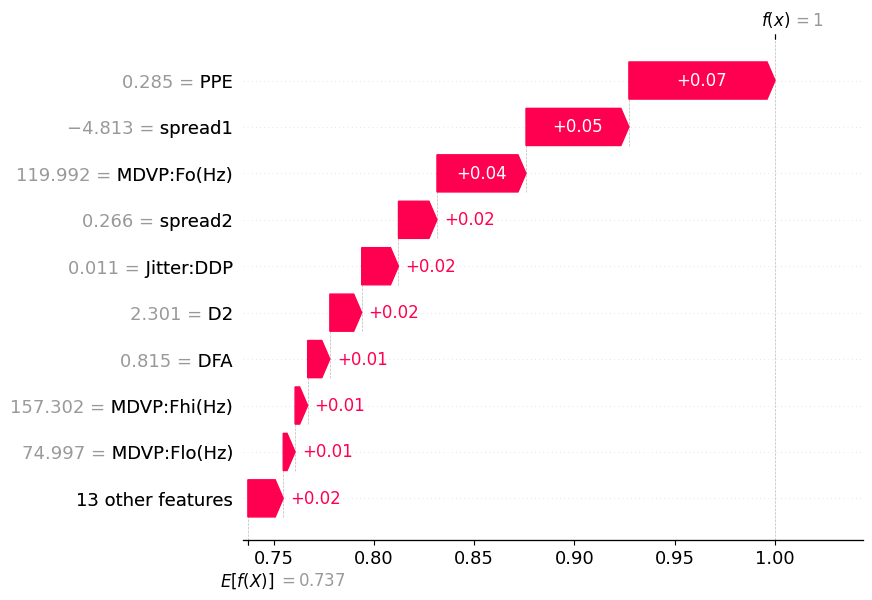

In [ ]:
shap.plots.waterfall(shap_values[0])

# boosting ensemble technique : Boosting is an ensemble technique that combines multiple weak learners to create a strong learner. Unlike bagging, boosting trains models sequentially, with each model giving more weight to instances that the previous models misclassified.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base Decision Tree classifier (a weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can adjust the hyperparameters

# Create an AdaBoost classifier using the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8717948717948718
Confusion Matrix:
[[ 4  3]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=adaboost_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


###########--------------------------------------------------------------------------#########
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=adaboost_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

In [ ]:
model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42).fit(X_train, y_train)
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer(X)

  0%|          | 0/195 [00:00<?, ?it/s]

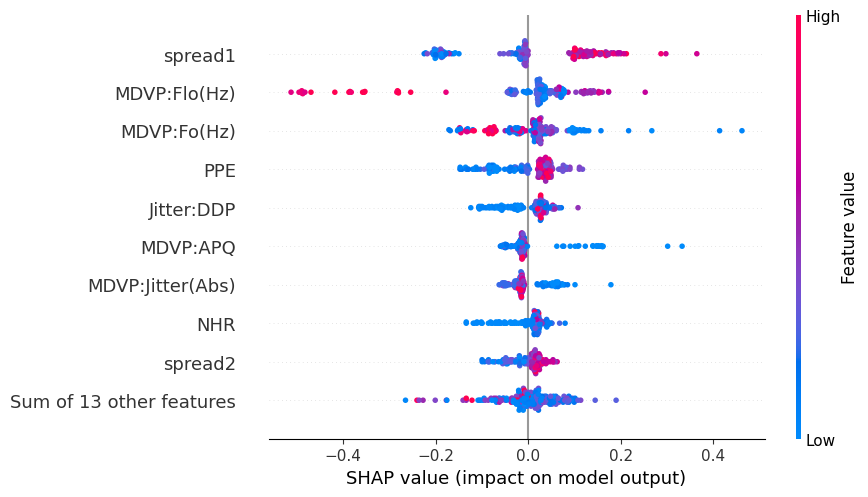

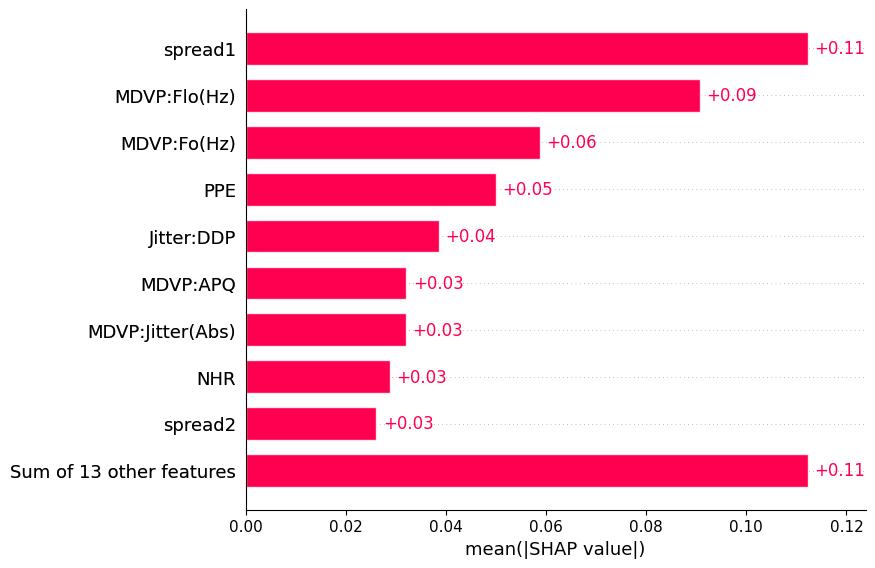

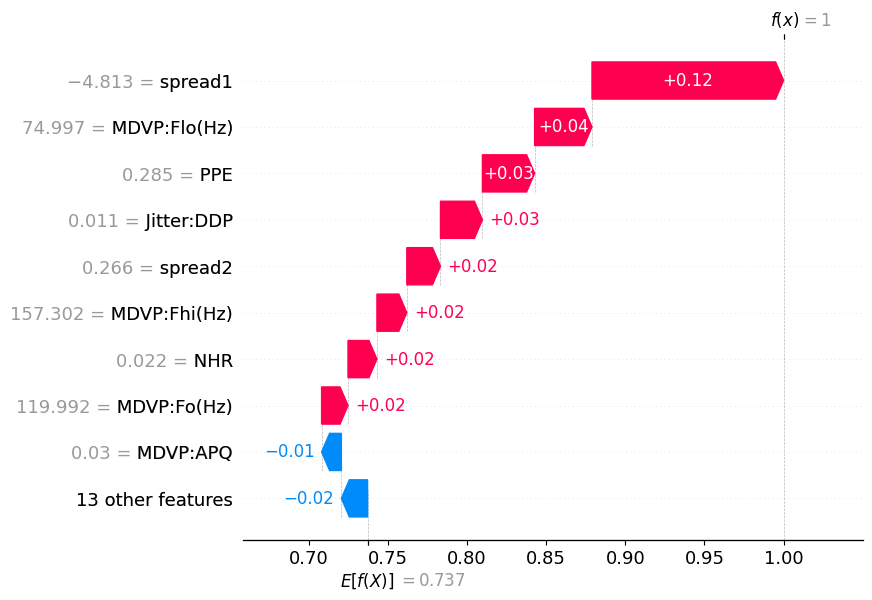

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

# Stacking is an ensemble learning technique that combines the predictions of multiple models by training a meta-model on top of their outputs.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)
stacking_model = stacking_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=stacking_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=stacking_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

In [ ]:
#model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42).fit(X_train, y_train)
explainer = shap.KernelExplainer(stacking_model.predict, X_train)
shap_values = explainer(X)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


  0%|          | 0/195 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but

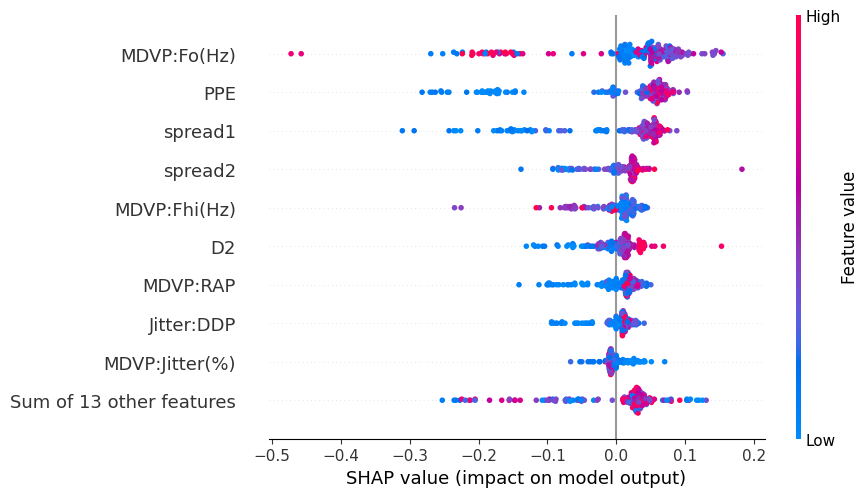

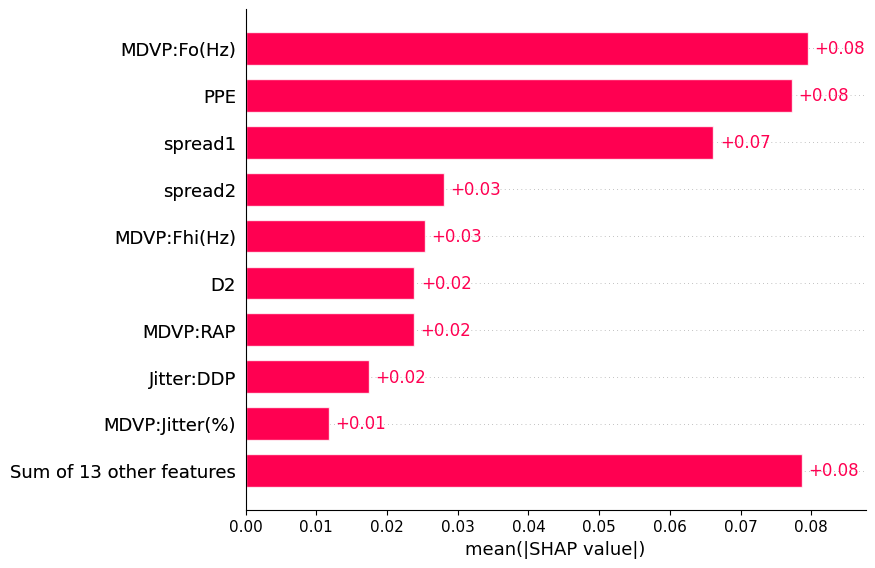

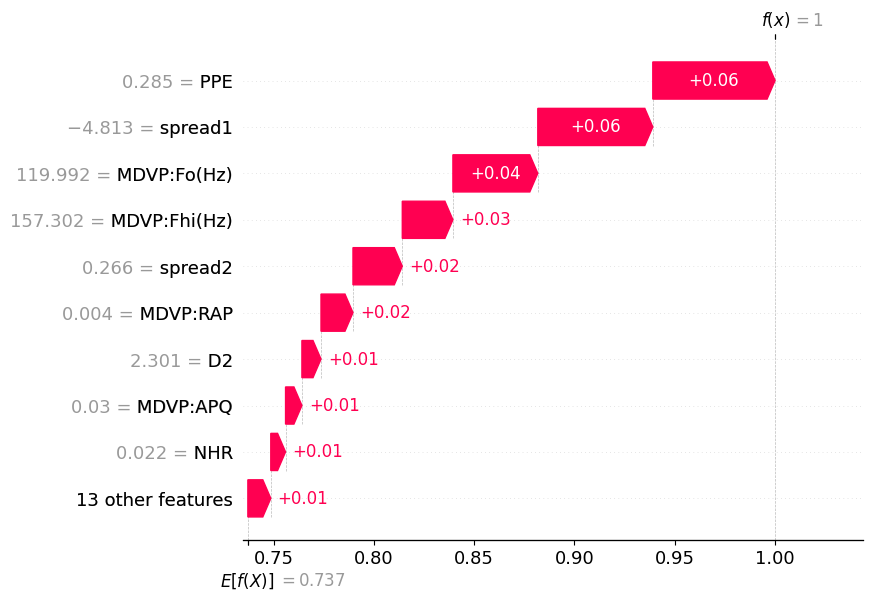

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

**SVM**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)
svm_model=svm_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8717948717948718
Confusion Matrix:
[[ 4  3]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



In [ ]:
import lime
from lime import lime_tabular
feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'],
    mode='classification')

exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=model.predict_proba)
exp.show_in_notebook(show_table=True)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
test_1 = X_test.iloc[1]
X.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X),
    feature_names=X.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=svm_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X),
    feature_names=X.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=svm_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
#model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42).fit(X_train, y_train)
explainer = shap.KernelExplainer(svm_model.predict, X_train)
shap_values = explainer(X)

  0%|          | 0/195 [00:00<?, ?it/s]

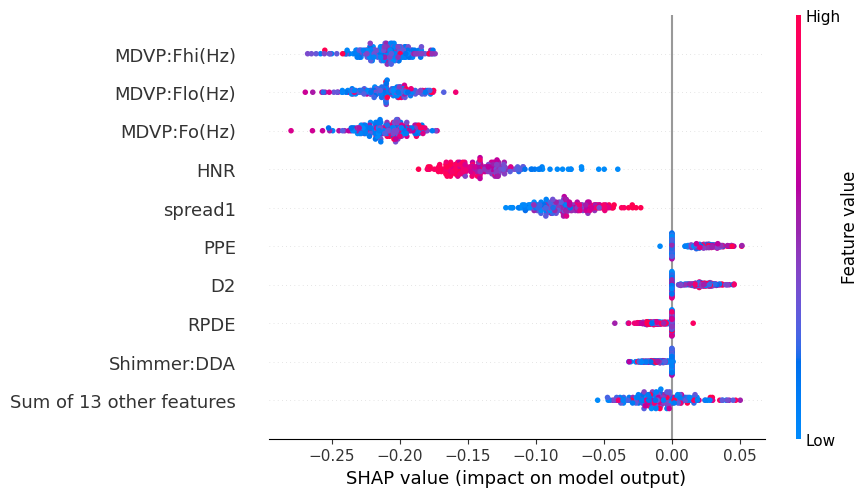

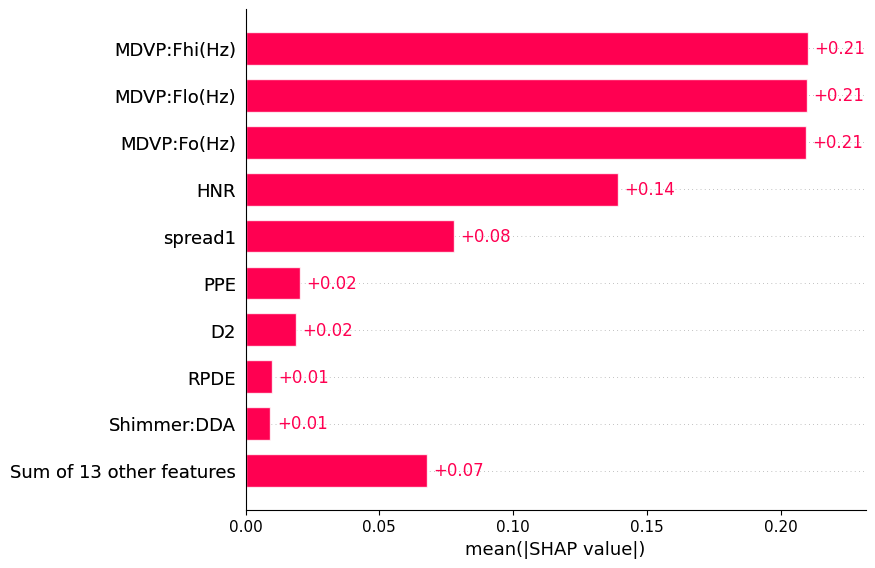

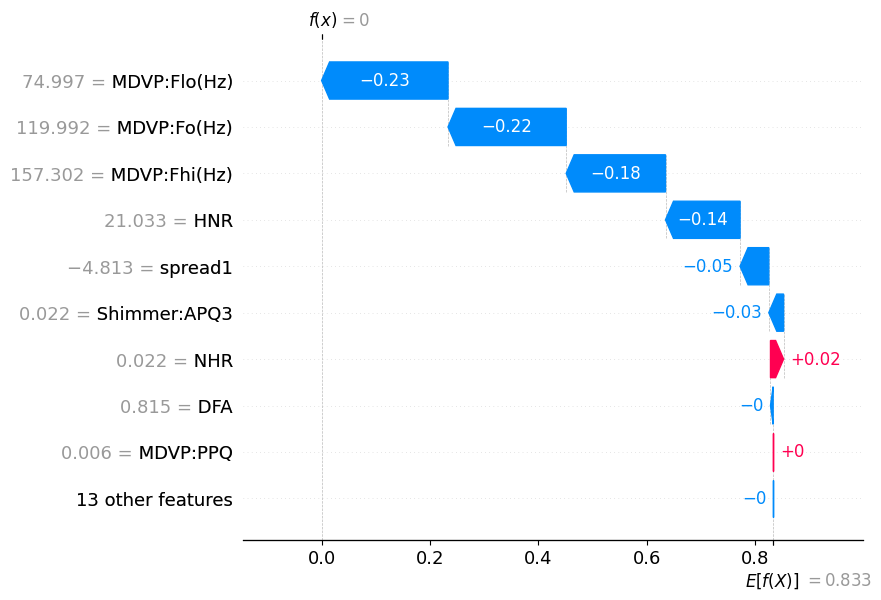

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

KNN

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)
knn_model=knn_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9230769230769231
Confusion Matrix:
[[ 6  1]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.97      0.94      0.95        32

    accuracy                           0.92        39
   macro avg       0.86      0.90      0.88        39
weighted avg       0.93      0.92      0.93        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=knn_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=knn_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
explainer = shap.KernelExplainer(knn_model.predict, X_train)
shap_values = explainer(X)

  0%|          | 0/195 [00:00<?, ?it/s]

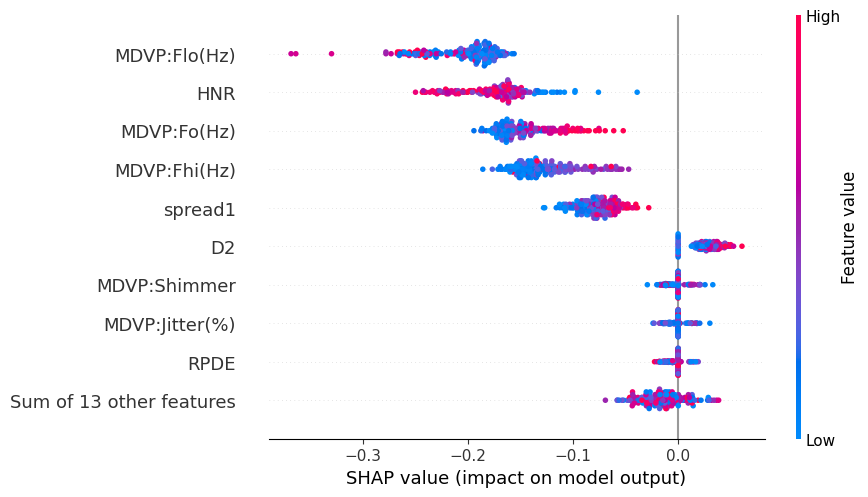

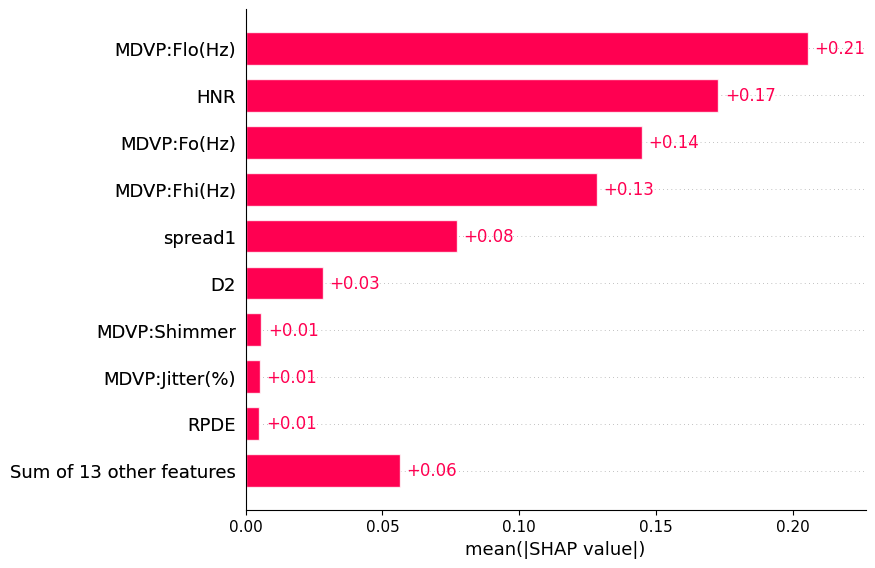

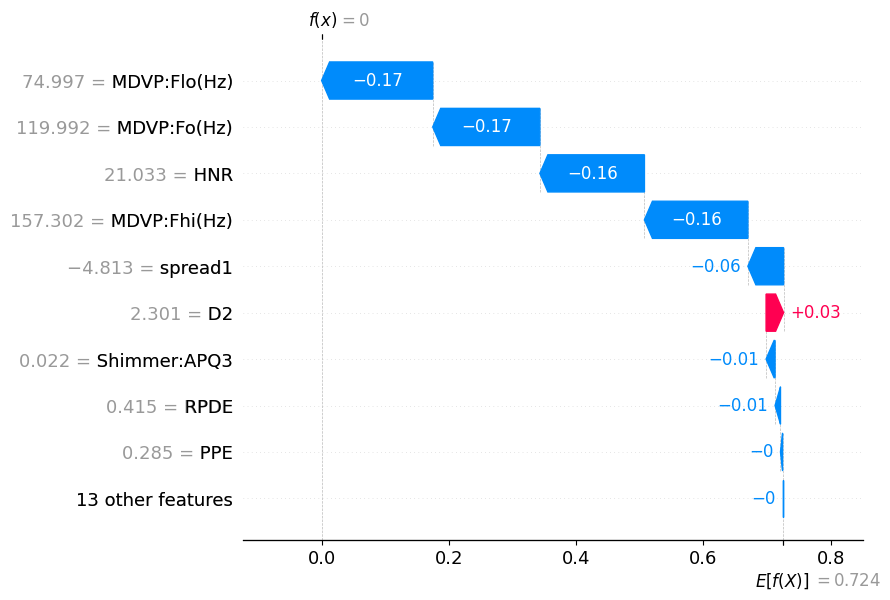

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

**RF**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)
fr_model=rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=bagging_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=bagging_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

In [ ]:
explainer = shap.KernelExplainer(fr_model.predict, X_train)
shap_values = explainer(X)

  0%|          | 0/195 [00:00<?, ?it/s]

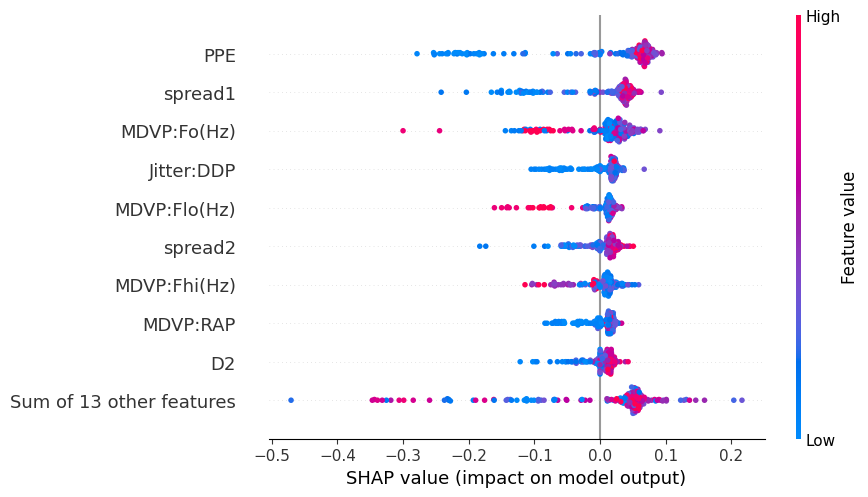

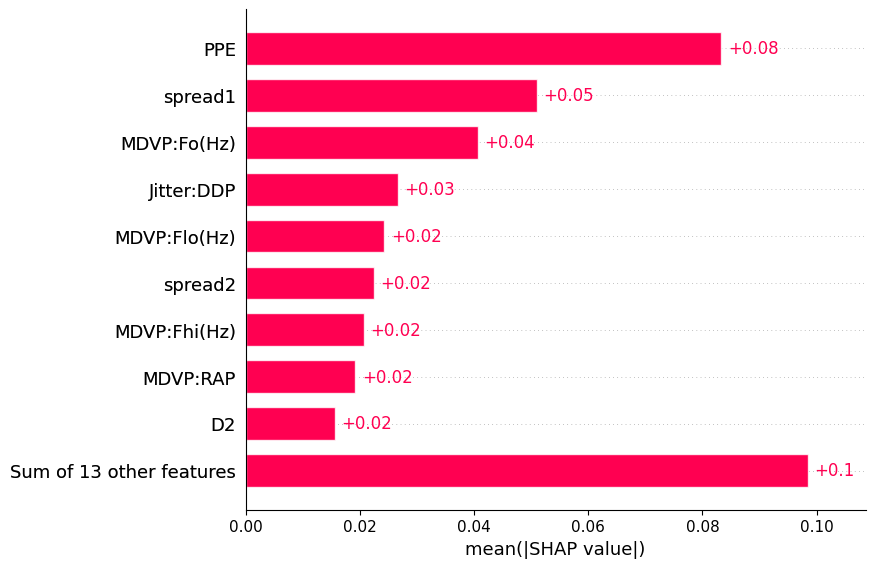

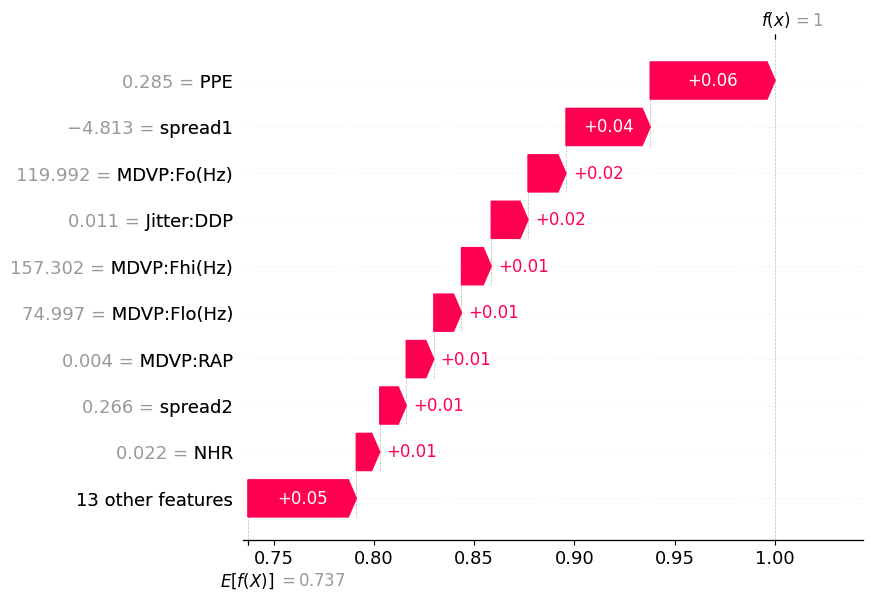

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

**DT**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)
dt_model=dt_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9230769230769231
Confusion Matrix:
[[ 5  2]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=dt_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=dt_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

In [ ]:
explainer = shap.KernelExplainer(dt_model.predict, X_train)
shap_values = explainer(X)

  0%|          | 0/195 [00:00<?, ?it/s]

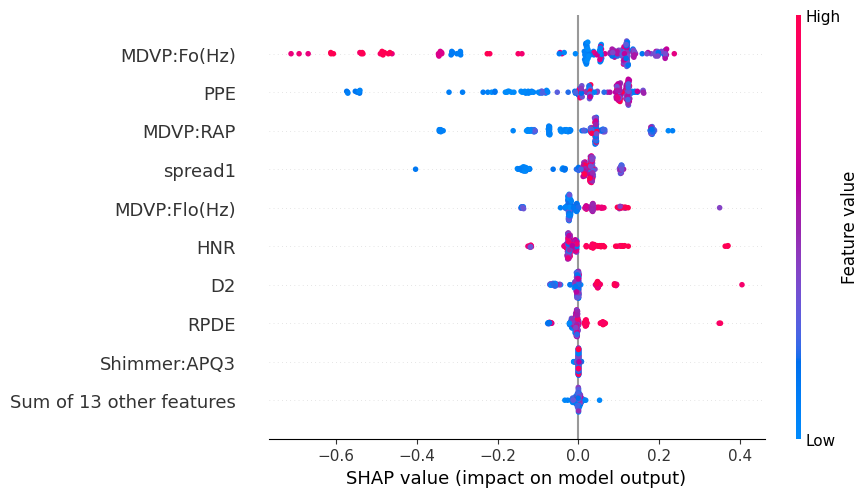

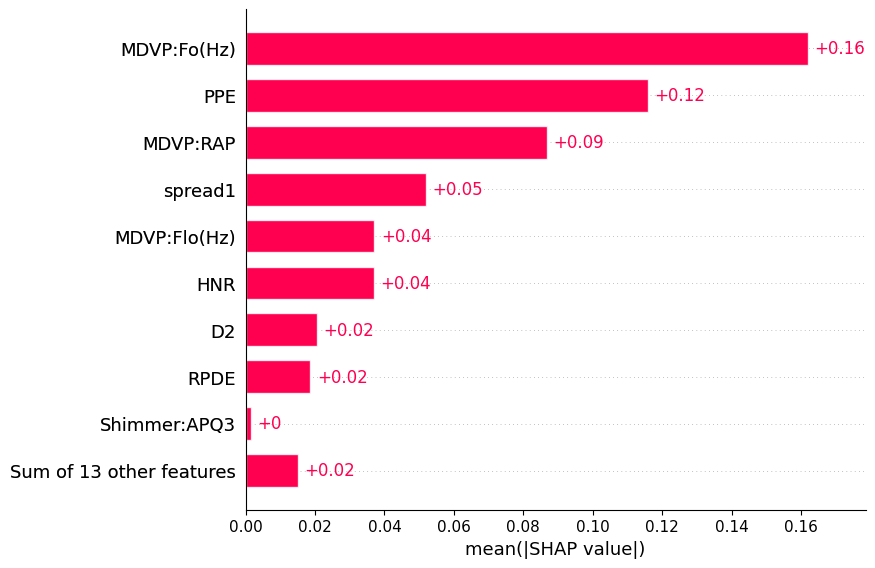

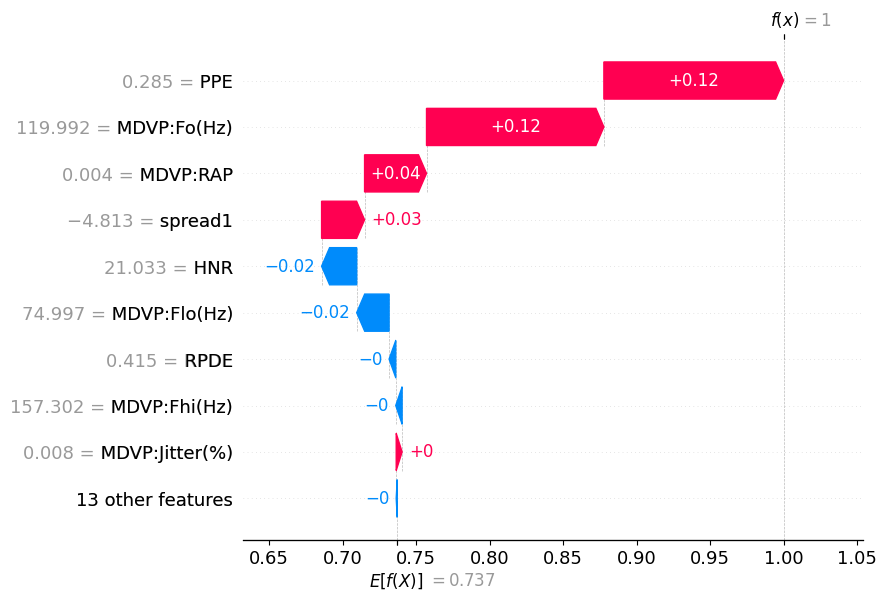

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

**NB**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values (optional for Naive Bayes, but can be beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier on the training data
gnb_classifier.fit(X_train, y_train)
gnb_model=gnb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = gnb_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.717948717948718
Confusion Matrix:
[[ 4  3]
 [ 8 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.89      0.75      0.81        32

    accuracy                           0.72        39
   macro avg       0.61      0.66      0.62        39
weighted avg       0.79      0.72      0.74        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=gnb_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=gnb_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
explainer = shap.KernelExplainer(gnb_model.predict, X_train)
shap_values = explainer(X)

  0%|          | 0/195 [00:00<?, ?it/s]

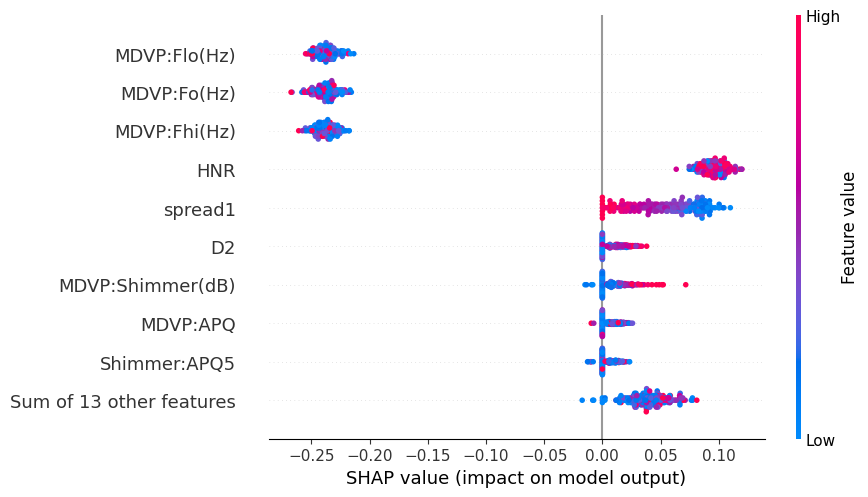

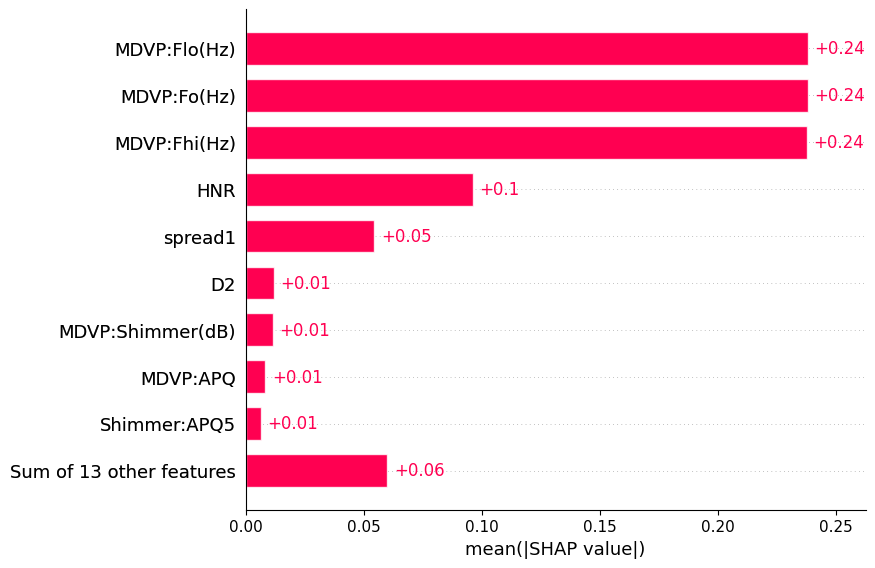

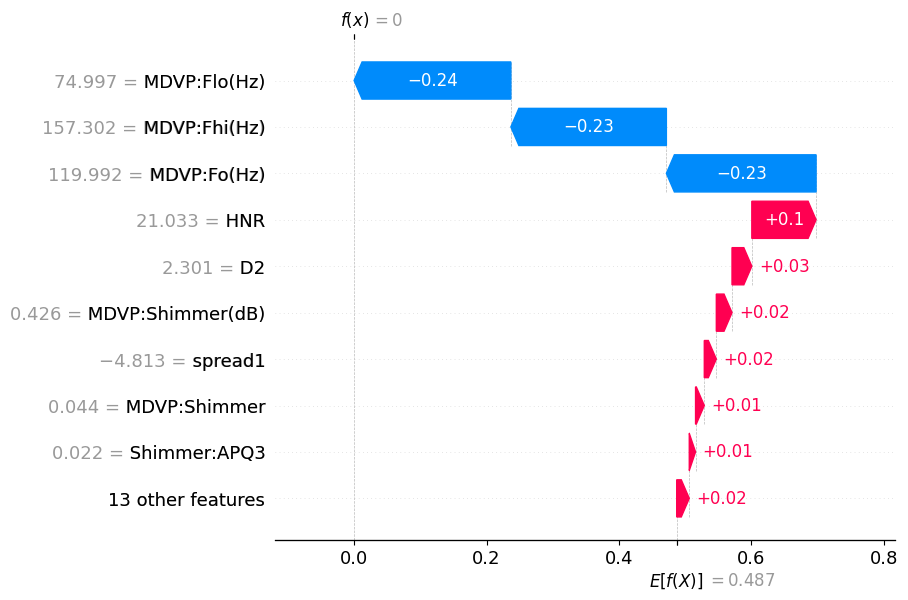

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

**LR**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# For binary classification, let's use only two classes (0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)
LR_model=logreg_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8974358974358975
Confusion Matrix:
[[ 3  4]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=logreg_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=logreg_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
explainer = shap.KernelExplainer(LR_model.predict, X_train)
shap_values = explainer(X)

  0%|          | 0/195 [00:00<?, ?it/s]

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

**Extra** Trees

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Extra Trees classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
et_classifier.fit(X_train, y_train)
et_model=et_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = et_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=et_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=et_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

In [ ]:
explainer = shap.KernelExplainer(et_model.predict, X_train)
shap_values = explainer(X)

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

**AdaBoost**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base Decision Tree classifier (a weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can adjust the hyperparameters

# Create an AdaBoost classifier using the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)
adb_model=adaboost_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8717948717948718
Confusion Matrix:
[[ 4  3]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=adaboost_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=adaboost_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

In [ ]:
explainer = shap.KernelExplainer(adb_model.predict, X_train)
shap_values = explainer(X)

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

**Gradiant Boosting**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)
gb_model=gb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9230769230769231
Confusion Matrix:
[[ 5  2]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=gb_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=gb_classifier.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

In [ ]:
explainer = shap.KernelExplainer(gb_model.predict, X_train)
shap_values = explainer(X)

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

**XGBoost** (Extreme Gradient Boosting)

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DMatrix for efficient handling of data in XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'multi:softmax',  # for multiclass classification
    'num_class': 3,  # number of classes in the target variable
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'merror'
}

# Train the XGBoost model
num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Convert predicted labels to integers
y_pred = y_pred.astype(int)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
test_1 = X_test.iloc[1]
X_train.shape


lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=xgb_model.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)


#---------------------------------------------------
test_1 = X_test.iloc[0]
X_train.shape
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification',
    verbose=True
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=xgb_model.predict_proba,
    num_features=4,top_labels=1
)
lime_exp.show_in_notebook(show_table=True)

In [ ]:
explainer = shap.KernelExplainer(xgb_model.predict, X_train)
shap_values = explainer(X)

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])